In [1]:
from OpInf import *
import numpy as np
import scipy

import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from itertools import product, combinations

from sklearn.manifold import SpectralEmbedding

from pathlib import Path
import json
import stiefel

import importlib
importlib.reload(stiefel)

from scipy.io import loadmat
from operators import ckron, ckron_indices

import scienceplots
plt.style.use(["science", "no-latex", "grid"])

# set numpy random seed
np.random.seed(3)


check syl solve
True
here
True
6.11621426621363e-14
Use algebraic Stiefel log, metric alpha =  -0.0
dist 3.7699111843077526
NORM TEST1: 0.0
NORM TEST2: 2.1482642054149181e-13
NORM TEST3: 7.845070079670613e-15


In [2]:
from Representation import *

In [3]:
mus = [1.1, 1.05, 1, 0.95, 0.9]
# mus = [1.15, 1.1, 1.05, 1, 0.95, 0.9, 0.85]
# Load data
T_end_train = 2 
dt= 1e-3
Train_T = int(T_end_train/dt)

X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000.npy")[:, :Train_T+1, :]
# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu1.15_0.85.npy")[:, :Train_T+1, :]
# X_all_nominal_2 = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu04_12.npy")[:, :Train_T+1, :]

In [4]:
p = 2
Mp = len(mus)
dt = 1e-3
T_end = 2

config = {
    "N": 2**7 + 1 + 1,
    "dt": 1e-3,
    "T_end": T_end,
    "mus": list(mus),
    "Mp": Mp,
    "K": T_end / dt,  # T_end / dt
    "DS": 1,
    "params": {
        "modelform": "LQCP",
        "modeltime": "continuous",
        "dt": dt,
        "ddt_order": "BE",
        "p": p, # polynomial order
        "lambda1": 5e-2,
        "lambda2": 5e-2,
        "lambda3": 100,
    },
    "type": "single"
}




In [5]:
np.random.randint(2, 5)

4

In [6]:
mus

[1.1, 1.05, 1, 0.95, 0.9]

In [8]:
# # a colors list to tag the group of combinations
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create a dictionary to store combinations with their respective colors
tagged_combinations = {}

for r in range(len(mus), 2, -1):
    combinations_ = list(combinations(mus, r))
    print(f"{len(combinations_)} of combinations generated: ", combinations_)
    
    # Ensure that there are enough colors, cycle through colors if necessary
    color = colors[(len(mus) - r) % len(colors)]
    
    # Store the combinations with their tag
    tagged_combinations[color] = combinations_
    
# Flatten the list and maintain the color tagging
flattened_tagged_combinations = [(item, color) for color, combos in tagged_combinations.items() for item in combos]

# Example of accessing the flattened list with color tags
for combo, color in flattened_tagged_combinations:
    print(f"Combination: {combo}, Color: {color}")

1 of combinations generated:  [(1.1, 1.05, 1, 0.95, 0.9)]
5 of combinations generated:  [(1.1, 1.05, 1, 0.95), (1.1, 1.05, 1, 0.9), (1.1, 1.05, 0.95, 0.9), (1.1, 1, 0.95, 0.9), (1.05, 1, 0.95, 0.9)]
10 of combinations generated:  [(1.1, 1.05, 1), (1.1, 1.05, 0.95), (1.1, 1.05, 0.9), (1.1, 1, 0.95), (1.1, 1, 0.9), (1.1, 0.95, 0.9), (1.05, 1, 0.95), (1.05, 1, 0.9), (1.05, 0.95, 0.9), (1, 0.95, 0.9)]
Combination: (1.1, 1.05, 1, 0.95, 0.9), Color: #0C5DA5
Combination: (1.1, 1.05, 1, 0.95), Color: #00B945
Combination: (1.1, 1.05, 1, 0.9), Color: #00B945
Combination: (1.1, 1.05, 0.95, 0.9), Color: #00B945
Combination: (1.1, 1, 0.95, 0.9), Color: #00B945
Combination: (1.05, 1, 0.95, 0.9), Color: #00B945
Combination: (1.1, 1.05, 1), Color: #FF9500
Combination: (1.1, 1.05, 0.95), Color: #FF9500
Combination: (1.1, 1.05, 0.9), Color: #FF9500
Combination: (1.1, 1, 0.95), Color: #FF9500
Combination: (1.1, 1, 0.9), Color: #FF9500
Combination: (1.1, 0.95, 0.9), Color: #FF9500
Combination: (1.05, 1, 0

[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 2, 4]
[0, 1, 3, 4]
[0, 2, 3, 4]
[1, 2, 3, 4]
[0, 1, 2]
[0, 1, 3]
[0, 1, 4]
[0, 2, 3]
[0, 2, 4]
[0, 3, 4]
[1, 2, 3]
[1, 2, 4]
[1, 3, 4]
[2, 3, 4]
X =  (130, 10005)
X_ref =  (130, 1)
S =  [195.85845056 118.38718397  75.13983429  56.39975761  42.78257547]
idx =  9
rel_err_SVD[idx] =  0.0354808318608314
X =  (130, 8004)
X_ref =  (130, 1)
S =  [178.62399472 107.94728039  68.34439878  51.24503623  38.84462047]
idx =  8
rel_err_SVD[idx] =  0.04190881809657043
X =  (130, 8004)
X_ref =  (130, 1)
S =  [176.9000944  106.93918971  67.77963153  50.92949938  38.59228419]
idx =  9
rel_err_SVD[idx] =  0.03546326493107754
X =  (130, 8004)
X_ref =  (130, 1)
S =  [175.17123406 105.90071968  67.20681571  50.51526137  38.29573988]
idx =  9
rel_err_SVD[idx] =  0.03548098972138214
X =  (130, 8004)
X_ref =  (130, 1)
S =  [173.43610171 104.83636274  66.62787472  50.01173126  37.96117752]
idx =  9
rel_err_SVD[idx] =  0.03550608873915606
X =  (130, 8004)
X_ref =  (130, 1)
S = 

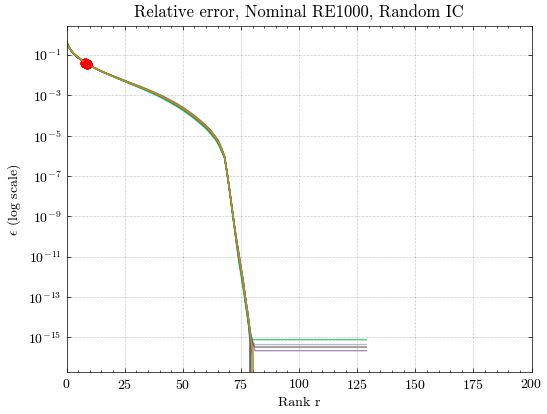

In [9]:
X_nominal = np.concatenate([X for X in X_all_nominal], axis=0).T

# randomly draw 3 ICs (mus) without replacement from X_all_nominal
# X_all_nominals_lst = [X_all_nominal, X_all_nominal_2]
X_list = []
drawn_mus = [tup[0] for tup in flattened_tagged_combinations]
color_tags = []
for n_X in range(len(flattened_tagged_combinations)):
    mus_idx = [mus.index(mus_) for mus_ in flattened_tagged_combinations[n_X][0]]
    print(mus_idx)
    color_tags.append(flattened_tagged_combinations[n_X][1])
    X_list.append(np.concatenate([X_all_nominal[i] for i in mus_idx], axis=0).T)

X_list.append(X_nominal)
color_tags.append("cyan")

rob_lst = []
rel_err_SVD_lst = []
idx_lst = []
# names = [f"tap={taps}" for taps in numtaps] + ["Nominal"]
names = [f"mu={mus}" for mus in drawn_mus] + ["Nominal"]

fig, ax = plt.subplots(figsize=(6, 4.5))

err_tol = 5e-2

# mus = [0.01] # only one mu for now

for i in range(len(X_list)):
    
    X = X_list[i]
    
    # X_ref is the reference state which is just defined as the mean of the snapshots 
    X_ref = np.mean(X, axis=1)[:, None]
    
    print("X = ", X.shape)
    print("X_ref = ", X_ref.shape)
    
    # svd
    U, S, V = np.linalg.svd((X - X_ref), full_matrices=False)
    print("S = ", S[:5])
    eigvals_SVD = S**2 * (1 / (len(S) - 1))
    # print("eigvals_SVD = \n", eigvals_SVD[:5])
    # append U
    # print("U = ", U.shape)
    rob_lst.append(U)
    
    # calculate the relative error
    rel_err_SVD = 1 - (np.cumsum(eigvals_SVD) / np.sum(eigvals_SVD))
    rel_err_SVD_lst.append(rel_err_SVD)
    # print("rel_err_SVD = \n", rel_err_SVD[:4])

    # print the first idx when it is less than 1e-4
    idx = np.where(rel_err_SVD < err_tol)[0][0] + 1
    idx_lst.append(idx)
    print("idx = ", idx)
    print("rel_err_SVD[idx] = ", rel_err_SVD[idx])
    
    ax.plot(rel_err_SVD_lst[i], label=names[i], linestyle='-', alpha=0.7)
    ax.plot(idx, rel_err_SVD[idx], 'ro', label=f"{err_tol:.2e} at r={idx}, {names[i]}")
    ax.set_yscale('log')
    ax.set_ylabel("$\epsilon$ (log scale)")
    # set limit
    ax.set_xlim([0, 200])
    # ax.set_ylim([1e-13, 1e-3])
    # show grid
    ax.grid(True, alpha=0.2)
    ax.set_xlabel("Rank r")
    ax.set_title("Relative error, Nominal RE1000, Random IC")
    # ax.legend()

In [10]:
# Model parameters
# r = np.max(idx_lst)
r = idx_lst[-1]
q_trunc = 2
# p = 3

tol = 1e-3      # tolerence for alternating minimization
gamma = 0.01       # regularization parameter
max_iter = 100  # maximum number of iterations

Vr_lst = []
Vbar_lst = []
Shat_lst = []
Xi_lst = []
Poly_lst = []

for i in range(len(X_list)):
    # Procustes problem for each mu
    X = X_list[i]
    num_snapshots = X.shape[1]
    print("num_snapshots: ", num_snapshots)
    print("X = ", X.shape)
    X_ref = np.mean(X, axis=1)[:, None]
    # X_ref = np.zeros((X.shape[0]))[:, None]
    X_centered = X - X_ref

    U, S, Vr = np.linalg.svd(X_centered, full_matrices=False)
    
    Vr = U[:, :r]
    Vbar = U[:, r:r + q_trunc]
    q = Vr.T @ X_centered
    Proj_error = X_centered - (Vr @ q)
    Poly = np.concatenate(polynomial_form(q, p), axis=0)
    Xi = Vbar.T @ Proj_error @ Poly.T @ np.linalg.inv(Poly @ Poly.T + gamma * np.identity((p - 1)*r))
    
    energy = np.linalg.norm(Vr @ q + (Vbar @ Xi @ Poly), 'fro')**2 / np.linalg.norm(X - X_ref, 'fro')**2
    
    print(f"Snapshot energy: {energy:e}")

    Gamma_MPOD = X_ref + (Vr @ q) + (Vbar @ Xi @ Poly)
    print(f"\nReconstruction error: {relative_error(X, Gamma_MPOD, X_ref):.4%}")
    
    Vr_lst.append(Vr)
    Vbar_lst.append(Vbar)
    Shat_lst.append(q)
    Xi_lst.append(Xi)
    Poly_lst.append(Poly)

    # q, energy, Xi, Vr, Vbar, Poly = alternating_minimization(X, X_ref, num_snapshots, max_iter, 1e-3, gamma, r, q, p, initial_Shat=None)

    # print("q = ", q.shape)
    # print("qbar = ", qbar.shape)

num_snapshots:  10005
X =  (130, 10005)


Snapshot energy: 9.620219e-01

Reconstruction error: 19.4879%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.627664e-01

Reconstruction error: 19.2959%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.619338e-01

Reconstruction error: 19.5105%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.616702e-01

Reconstruction error: 19.5779%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.618069e-01

Reconstruction error: 19.5429%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.627514e-01

Reconstruction error: 19.2997%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.634384e-01

Reconstruction error: 19.1209%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.624545e-01

Reconstruction error: 19.3765%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.614992e-01

Reconstruction error: 19.6215%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.624316e-01

Reconstruction error: 19.3824%
num_snapshots:  6003
X =  (130, 6003)


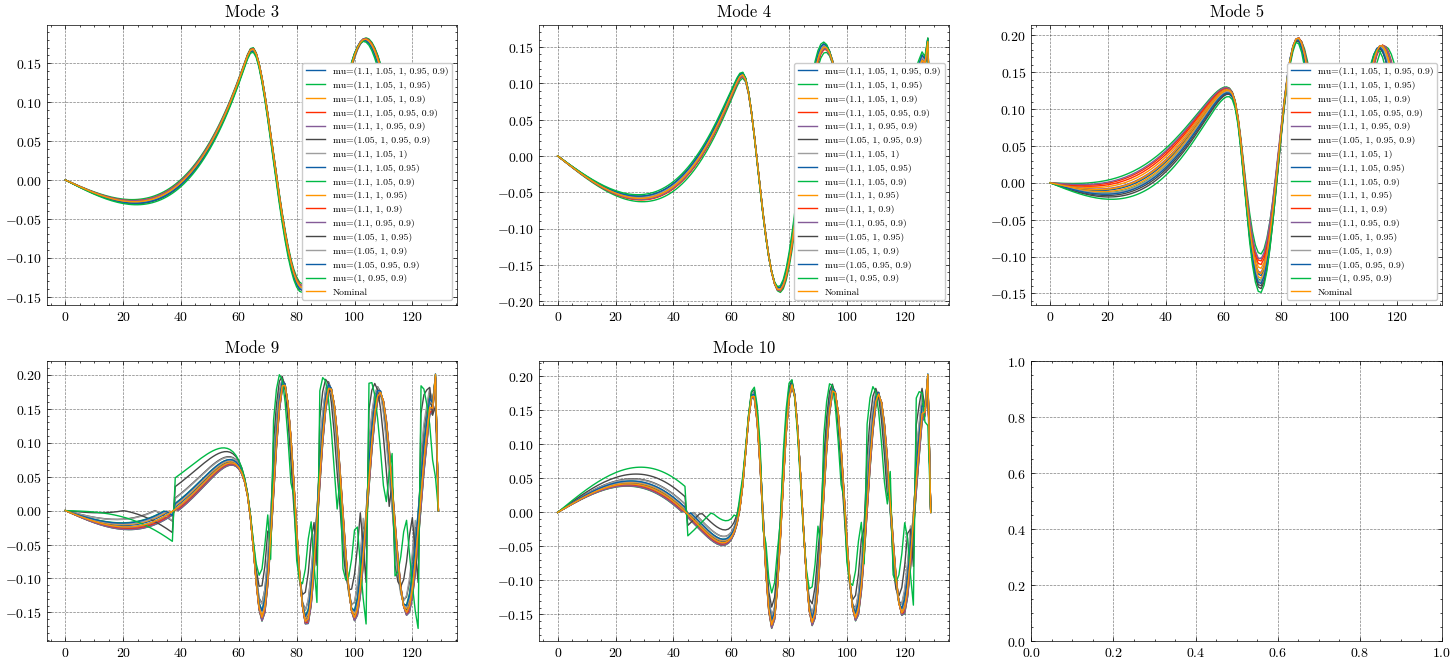

In [11]:
# Aligning the signs of Vr_lst with Vr_lst[-1]
nominal_signs = np.sign(Vr_lst[-1])
non_zero_signs_ind = nominal_signs != 0
for i in range(len(Vr_lst) - 1):
    max_inds = np.argmax(Vr_lst[-1], axis=0) # max indexes for each column corresponding to the largest value in each column
    for j in range(Vr_lst[i].shape[1]):
        if np.sign(Vr_lst[i][max_inds[j], j]) != np.sign(Vr_lst[-1][max_inds[j], j]):
            Vr_lst[i][:, j] = -Vr_lst[i][:, j]

# For Vbar_lst, ensuring sign agreement with Vbar_lst[-1] using np.copysign\
for i in range(len(Vbar_lst)):
    Vbar_lst[i] = np.copysign(Vbar_lst[i], Vbar_lst[-1])


# plot first 3 modes of Vr and Vbar
n_modes_viz = 3
fig, axs = plt.subplots(2, n_modes_viz, figsize=(18, 8))
for i in range(n_modes_viz):
    for j in range(len(Vr_lst)):
        axs[0, i].plot(Vr_lst[j][:, i+3], label=names[j])
        axs[0, i].legend(fontsize='x-small')
    axs[0, i].set_title(f"Mode {i+3}")

for i in range(2):
    for j in range(len(Vbar_lst)):
        axs[1, i].plot(Vbar_lst[j][:, i])
    axs[1, i].set_title(f"Mode {r + i}")

In [12]:
# plot spectral embedding of the generated stiefel sampels
flat_Vr_arr = np.concatenate([rob.flatten()[:, None] for rob in Vr_lst], axis=1)
flat_Vbar_arr = np.concatenate([rob.flatten()[:, None] for rob in Vbar_lst], axis=1)

# colors = 
colors = plt.cm.tab20c(np.linspace(0, 1, len(Vr_lst)))


# Perform spectral embedding
embedder = SpectralEmbedding(n_components=2)
embedding_Vr = embedder.fit_transform(flat_Vr_arr.T)
embedding_Vbar = embedder.fit_transform(flat_Vbar_arr.T)

/home/jy384/miniconda3/envs/fenicsx/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/jy384/miniconda3/envs/fenicsx/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


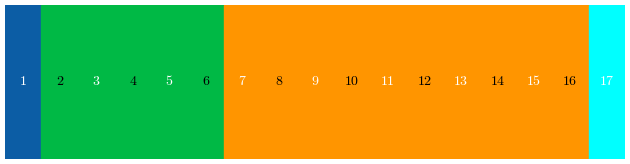

In [13]:
# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(8, 2))  # Adjust the figure size as needed

# Loop through the colors and plot each one as a rectangle
for i, color in enumerate(color_tags):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
    ax.text(i + 0.5, 0.5, str(i + 1), color='white' if i % 2 == 0 else 'black',
            horizontalalignment='center', verticalalignment='center')

# Set limits and remove axes for better visualization
ax.set_xlim(0, len(colors))
ax.set_ylim(0, 1)
ax.axis('off')

# Show the plot
plt.show()

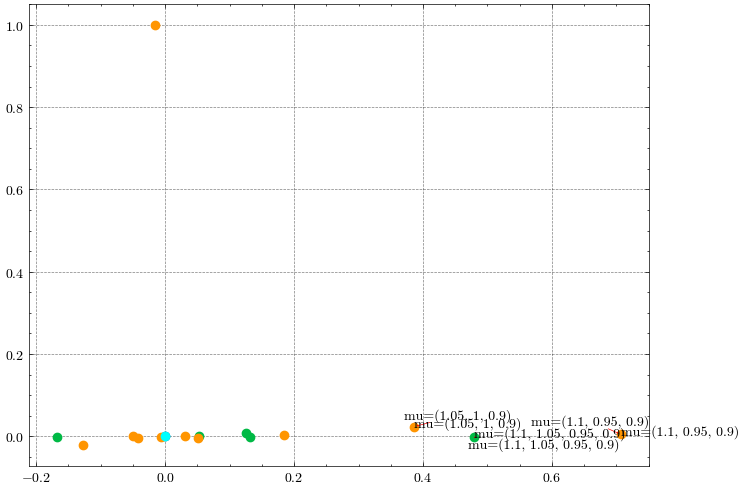

In [14]:
import adjustText

texts = []

# plot the spectral embedding with the color tags
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(Vr_lst)):
    ax.scatter(embedding_Vr[i, 0], embedding_Vr[i, 1], c=color_tags[i], label=names[i])
    # ax.scatter(embedding_Vbar[i, 0], embedding_Vbar[i, 1], c=color_tags[i], marker='x')
    # ax.annotate(names[i], (embedding_Vbar[i, 0], embedding_Vbar[i, 1]))

# Get the furthest 3 points from the nominal point in the spectral embedding
spectral_dist = np.linalg.norm(embedding_Vr - embedding_Vr[-1], axis=1)
furthest_3 = np.argsort(spectral_dist)[-4:-1]

for i in range(len(furthest_3)):
    ax.annotate(names[furthest_3[i]], (embedding_Vr[furthest_3[i], 0], embedding_Vr[furthest_3[i], 1]))
    texts.append(ax.text(embedding_Vr[furthest_3[i], 0], embedding_Vr[furthest_3[i], 1], names[furthest_3[i]]))

# adjust the texts
adjustText.adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

In [15]:
# find an embedding that are far from the nominal embedding, and then another that is far from the first far embedding
# find the farthest embedding from the nominal embedding

In [16]:
Mp = len(mus)
Nsnapshots = X.shape[1]
dShatdt = []
Shat_lst = []
dSdt = []
for j in range(Mp):
    start_ind = int((j) * Nsnapshots/Mp)
    end_ind = int((j+1) * Nsnapshots/Mp)
    print("start_ind: ", start_ind)
    print("end_ind: ", end_ind)
    ddtshat, ind = ddt(q[:, start_ind:end_ind], dt=dt, scheme='BE')
    ddts, ind = ddt(X[:, start_ind:end_ind], dt=dt, scheme="BE")
    dShatdt.append(ddtshat)
    ind = np.array(ind) + int((j) * Nsnapshots/Mp)
    Shat_lst.append(q[:, ind])
    dSdt.append(ddts)
    

start_ind:  0
end_ind:  2001
start_ind:  2001
end_ind:  4002
start_ind:  4002
end_ind:  6003
start_ind:  6003
end_ind:  8004
start_ind:  8004
end_ind:  10005


In [17]:
import importlib
import OpInf
# import reloading
# reload the whole OpInf module
importlib.reload(OpInf)
from OpInf import *


In [18]:
def initial_condition(coord):
    if coord <= 0.5:
        return np.sin(2 * np.pi * coord)
    
    return 0

# update config file with truncation order r
config['robparams'] = {
    "r": int(r)
}

Shat_py = np.concatenate(Shat_lst, axis=1)
dShatdt_py = np.concatenate(dShatdt, axis=1).T
dSdt_py = np.hstack(dSdt)

print("Shape of Shat_py: ", Shat_py.shape)
print("Shape of dShatdt_py: ", dShatdt_py.shape)

Shape of Shat_py:  (9, 10000)
Shape of dShatdt_py:  (10000, 9)


In [19]:
config['robparams'] = {
    "r": int(r)
}

N = int(config['N'])
dt = config['dt']
T_end = config['T_end']
mus = config['mus']  # Assuming mus is saved as a string that represents a Python expression
Mp = config['Mp']
K = int(config['K'])
DS = config['DS']
params = config['params']  # This will be a dictionary in Python
robparams = config['robparams']  # This will be a dictionary in Python


coord = np.linspace(0, 1, N)
print("coord = ", coord.shape)
IC = np.array([initial_condition(c) for c in coord])
q0 = Vr.T @ (IC[:, None] - X_ref).flatten()
time_domain = np.arange(0, T_end, dt)
train_size = Shat_py.shape[1]

# regs = [1e1, 3e3, 1e9]
# regs = [0.001, 20, 1e5]
Shat_true = Shat_lst[2]
# regs_product = [1e-3, 1e1, 3, 1e1, 1e4, 10, 1e1, 1e7, 7]

# regs_product = [10, 10, 1, 43.939705607607905, 43.939705607607905, 1, 27.825594022071257, 27.825594022071257, 1] # for r=5
# regs_product = [3, 3, 1, 10, 10, 1, 32, 32, 1]
regs_product = [1e-1, 1e-1, 1, 150, 150, 1, 10000, 10000, 1]
# regs_product = [10, 10, 1, 129.1549665014884, 129.1549665014884, 1, 1000000, 1000000, 1] # for r=12
# regs_product = [10, 10, 1, 4.47213595e+01, 4.47213595e+01, 1, 1.00000000e+07, 1.00000000e+07, 1] # for r=32
# [1.00000000e+01, 4.47213595e+01, 1.00000000e+07]
# [10.0, 129.1549665014884, 1000000.0]

# [10.0, 43.939705607607905, 27.825594022071257]
# regs_product = [1e-3, 1e-3, 1, 23, 60, 10]
# regs_product = [1e-3, 1e-2, 5, 1e-3, 1e-2, 5, 1e-3, 1e-1, 5]
# regs, operators = train_minimize(Shat_py, dShatdt_py, Shat_true, train_size, r, regs, time_domain, q0, params, testsize=None, margin=1.1)
regs, errors = train_gridsearch(Shat_py, dShatdt_py, Shat_true, train_size, r, regs_product, time_domain, q0, params, testsize=None, margin=1.1)


coord =  (130,)
Constructing least-squares solver, r=9
TRAINING 1 ROMS
(1/1) Testing ROM with (0.09999999999999999, 150.00000000000003, 10000.0)
Generating ghat ...
drp:  126
Obtained data matrix...
Regularization parameters:  0.09999999999999999 150.00000000000003 10000.0
Solving...
Solved!
Integrating...
Bound check passed


In [20]:
regs

[0.09999999999999999, 150.00000000000003, 10000.0]

In [21]:
errors

0.027901742952767185

In [22]:
# regs = [0.0005399173326341194, 23.61197176062329, 202651972.5062846]

params['lambda1'] = regs[0]
params['lambda2'] = regs[1]
if len(regs) > 2:
    params['lambda3'] = regs[2]

# params['lambda1'] = (5e-2)**2
# params['lambda2'] = (5e-2)**2
# if len(regs) > 2:
#     params['lambda3'] = regs[2]
operators = infer_operators_nl(Shat_py, None, config['params'], dShatdt_py)

Generating ghat ...
drp:  126
Obtained data matrix...
Regularization parameters:  0.09999999999999999 150.00000000000003 10000.0
Solving...
Solved!


In [23]:
import numpy as np
import itertools
from stiefel import *
import importlib
importlib.reload(stiefel)

N_stiefel_samples = 1000

V_combined_lst = [np.concatenate([Vr, Vbar], axis=1) for Vr, Vbar in zip(Vr_lst, Vbar_lst)]

# the global ROB as reference base point
U0 = V_combined_lst[-1]

# number of models excluding the global ROB
num_models = len(V_combined_lst) - 1

# rob has shape (num_models, n_points, n), where n_points is the number of points and n is the number of eigenvectors (order of samples)
n_points = V_combined_lst[0].shape[0]
n = V_combined_lst[0].shape[1]

# get the tangent vectors deltas
tau=0.00001
Deltas = batch_stiefel_log(U0, V_combined_lst, tau=tau, metric_alpha=0)


min_cond = np.inf
best_combination = None

for n_model in range(3, num_models+1):
    for combination in itertools.combinations(range(num_models), n_model):
        X = np.reshape(Deltas[list(combination), :, :], (n_model, -1))
        H = X @ X.T
        cond = np.linalg.cond(H)
        if cond < min_cond:
            min_cond = cond
            best_combination = combination
            
            # check full rank
            rank = np.linalg.matrix_rank(H)
            print(f"Rank: {rank}, Combintaion: {best_combination}, Condition Number: {cond} \n")
            # if rank == n_model:
            #     break
            

print("Best combination: ", best_combination)
print("Lowest condition number: ", min_cond)

Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Rank: 3, Combintaion: (1, 2, 3), Condition Number: 753.9890258399413 

Rank: 3, Combintaion: (1, 2, 4), Condition Number: 367.98735795573396 

Rank: 3, Combintaion: (1, 2, 5), Condition Number: 137.03257653727178 

Rank: 3, Combintaion

In [24]:
# Use the best combination to generate the samples
V_combined_lst = [V_combined_lst[i] for i in best_combination]
V_combined_lst.append(U0)

Vr_lst_sel = [V_combined[:, :r] for V_combined in V_combined_lst]
Vbar_lst_sel = [V_combined[:, r:r+q_trunc] for V_combined in V_combined_lst]

# change the names too
names_sel = [names[i] for i in best_combination]
names_sel.append("nominal")

# Generate the samples and split them into two arrays
stiefel_samples_combined = stiefel.gen_stiefel_samples(N_stiefel_samples, V_combined_lst, tau=0.00001, metric_alpha=0.0000000000)
stiefel_samples_Vr = np.array([sample[:, :r] for sample in stiefel_samples_combined])
stiefel_samples_Vbar = np.array([sample[:, r:r+q_trunc] for sample in stiefel_samples_combined])

Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
                                     CVXPY                                     
                                     v1.4.2                                    
(CVXPY) May 13 03:56:52 PM: Your problem has 3 variables, 3 constraints, and 0 parameters.
(CVXPY) May 13 03:56:52 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 13 03:56:52 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 13 03:56:52 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 13 03:56:52 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation

In [25]:
frechet_mean = calc_frechet_mean_mat(stiefel_samples_combined, V_combined_lst[-1], eps=1e-2, tau=1e-3)

Vr_frechet_mean = frechet_mean[0][:, :r]
Vbar_frechet_mean = frechet_mean[0][:, r:+r+q_trunc]

Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic

Vbar mu=(1, 0.95, 0.9)
Vbar mu=(1.1, 1.05, 0.9)
Vbar mu=(1.1, 1.05, 1)


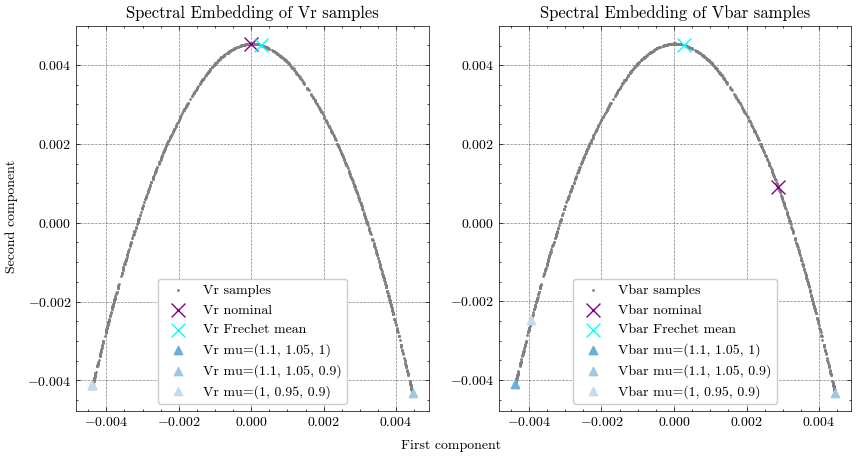

In [26]:
# plot spectral embedding of the generated stiefel sampels
flat_Vr_arr = np.concatenate([rob.flatten()[:, None] for rob in Vr_lst_sel], axis=1)
flat_Vbar_arr = np.concatenate([rob.flatten()[:, None] for rob in Vbar_lst_sel], axis=1)
flat_Vr_frechet_mean = Vr_frechet_mean.flatten()[:, None]
flat_Vbar_frechet_mean = Vbar_frechet_mean.flatten()[:, None]
rob_Vr_all = np.concatenate([rob.flatten()[:, None] for rob in stiefel_samples_Vr] + [flat_Vr_arr] + [flat_Vr_frechet_mean], axis=1)
rob_Vbar_all = np.concatenate([rob.flatten()[:, None] for rob in stiefel_samples_Vbar] + [flat_Vbar_arr] + [flat_Vbar_frechet_mean], axis=1)

from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt

# colors = 
colors = plt.cm.tab20c(np.linspace(0, 1, len(Vr_lst)))


# Perform spectral embedding
embedder = SpectralEmbedding(n_components=2)
embedding_Vr = embedder.fit_transform(rob_Vr_all.T)
embedding_Vbar = embedder.fit_transform(rob_Vbar_all.T)

# Plot the embeddings
fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(embedding_Vr[:-2, 0], embedding_Vr[:-2, 1], color='gray', s=1, label='Vr samples')
plt.scatter(embedding_Vr[-2, 0], embedding_Vr[-2, 1], color='purple', label='Vr nominal', marker='x', s=100)
plt.scatter(embedding_Vr[-1, 0], embedding_Vr[-1, 1], color='cyan', label='Vr Frechet mean', marker='x', s=100)


for i in range(1, len(Vr_lst_sel)):
    plt.scatter(embedding_Vr[-i-2, 0], embedding_Vr[-i-2, 1], color=colors[i], label=f"Vr {names_sel[i-1]}", marker='^')
    # plt.scatter(embedding_Vr[-i-2, 0], embedding_Vr[-i-2, 1], label=f"Vr {names[-i-1]}, $\\beta$={beta[-1]:.2e}", marker='^', color=colors[i])

plt.legend()
plt.title('Spectral Embedding of Vr samples')
# plt.xlabel('First component')
# plt.ylabel('Second component')


plt.subplot(1, 2, 2)
plt.scatter(embedding_Vbar[:-2, 0], embedding_Vbar[:-2, 1], color='gray', s=1, label='Vbar samples')
plt.scatter(embedding_Vbar[-2, 0], embedding_Vbar[-2, 1], color='purple', label='Vbar nominal', marker='x', s=100)
plt.scatter(embedding_Vbar[-1, 0], embedding_Vbar[-1, 1], color='cyan', label='Vbar Frechet mean', marker='x', s=100)

for i in range(1,len(Vbar_lst_sel)):
    plt.scatter(embedding_Vbar[-i-2, 0], embedding_Vbar[-i-2, 1], color=colors[i], label=f"Vbar {names_sel[i-1]}", marker='^')
    print(f"Vbar {names_sel[-i-1]}")
    # plt.scatter(embedding_Vbar[-i-2, 0], embedding_Vbar[-i-2, 1], label=f"Vbar {names[-i-1]}, $\\beta$={beta[-1]:.2e}", marker='^', color=colors[i])
    

plt.legend()
plt.title('Spectral Embedding of Vbar samples')

# plt.xlabel('First component')
# plt.ylabel('Second component')

# Add common x and y labels
fig.text(0.5, 0.04, 'First component', ha='center', va='center')
fig.text(0.06, 0.5, 'Second component', ha='center', va='center', rotation='vertical')
plt.show()

In [27]:
modelform = config['params']['modelform']

def rhs(t, state, operators, multi_indices, modelform, input_func=None):
    r"""Evaluate the right-hand side of the model by applying each operator
    and summing the results.

    This is the function :math:`\Ophat(\qhat, \u)`
    where the model can be written as one of the following:

    * :math:`\ddt\qhat(t) = \Ophat(\qhat(t), \u(t))` (continuous time)
    * :math:`\qhat_{j+1} = \Ophat(\qhat_j, \u_j)` (discrete time)
    * :math:`\widehat{\mathbf{g}} = \Ophat(\qhat, \u)` (steady state)

    Parameters
    ----------
    state : (r,) ndarray
        State vector.
    input_ : (m,) ndarray or None
        Input vector corresponding to the state.

    Returns
    -------
    evaluation : (r,) ndarray
        Evaluation of the right-hand side of the model.
    """
    state = np.atleast_1d(state)
    
    # print("State shape: ", state.shape)
    
    out = np.zeros(state.shape, dtype=float)
    # gs = gen_poly(state[:, None], p=2)  # Assuming gen_poly is designed for column vector input
    
    # print("Solving for regularization parameters: ", params['lambda1'], params['lambda2'], params['lambda3'])
    
    if 'L' in modelform:
        # print("adding A")
        out += operators['A'] @ state
    
    if 'Q' in modelform:
        # ssq = get_x_sq(state[:, None].T).T  # Assuming get_x_sq can handle the shape
        # out += operators['F'] @ ssq.flatten()
        # print("adding F")
        mask = ckron_indices(state.shape[0])
        out += (operators["F"] @ np.prod(state[mask], axis=1))
        
    if 'P' in modelform:
        gs = gen_poly(state[:, None], p=p, multi_indices=multi_indices)  # Assuming gen_poly is designed for column vector input
        out += (operators['P'] @ gs).flatten()
        
    if 'C' in modelform:
        out += operators['C'].flatten()
    
    return out


In [28]:
X_all_nominal_full = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000.npy")

In [29]:
T_end_index = int(T_end/dt)

In [30]:
# nominal s_rec_full

Vr = Vr_lst[-1]
Vbar = Vbar_lst[-1]


coord = np.linspace(0, 1, N)
# print("coord = ", coord.shape)
IC = np.array([initial_condition(c) for c in coord])
q0 = Vr.T @ (IC[:, None] - X_ref).flatten()

T_end_full = 8
time_domain_full = np.arange(0, T_end_full, dt)

train_size = Shat_py.shape[1]

multi_indices = generate_multi_indices_efficient(len(q0), p=p)


modelform = config['params']['modelform']
out_full = scipy.integrate.solve_ivp(
            rhs,  # Integrate this function
            [time_domain_full[0], time_domain_full[-1]],  # over this time interval
            q0,  # from this initial condition
            t_eval=time_domain_full,  # evaluated at these points
            args=[operators, multi_indices, modelform, None],  # additional arguments to rhs
            
        )

s_hat_full = out_full.y
poly_full = np.concatenate(polynomial_form(s_hat_full, p=p), axis=0)
Xi = Xi_lst[-1] # the nominal Xi
# print("Poly shape: ", poly_full.shape)

s_rec_full_nominal = X_ref + Vr @ s_hat_full + Vbar @ Xi @ poly_full


abs_error_full_nominal = np.abs(X_all_nominal_full[2].T - s_rec_full_nominal)
relative_error_testing_window_nominal = np.linalg.norm(X_all_nominal_full[2].T[:, T_end_index:] - s_rec_full_nominal[:, T_end_index:], 'fro') / np.linalg.norm(X_all_nominal_full[2].T[:, T_end_index:], 'fro')
relative_error_training_window_nominal = np.linalg.norm(X_all_nominal_full[2].T[:, :T_end_index] - s_rec_full_nominal[:, :T_end_index], 'fro') / np.linalg.norm(X_all_nominal_full[2].T[:, :T_end_index], 'fro')


In [31]:
import tqdm

N_samples = 1000
abs_error_full_lst = []
relative_error_testing_window_lst = []
relative_error_training_window_lst = []
s_rec_full_lst = []

for i in tqdm.tqdm(range(N_samples)):
    # # randomly choose 1 from stiefel_samples_Vr and 1 from stiefel_samples_Vbar
    # idx_Vr = np.random.randint(0, N_stiefel_samples)
    # idx_Vbar = np.random.randint(0, N_stiefel_samples)
    
    # print(i)
    
    Vr_sample = stiefel_samples_Vr[i]
    Vbar_sample = stiefel_samples_Vbar[i]
    

    coord = np.linspace(0, 1, N)
    # print("coord = ", coord.shape)
    IC = np.array([initial_condition(c) for c in coord])
    q0 = Vr_sample.T @ (IC[:, None] - X_ref).flatten()
    
    T_end_full = 8
    time_domain_full = np.arange(0, T_end_full, dt)
    
    train_size = Shat_py.shape[1]

    multi_indices = generate_multi_indices_efficient(len(q0), p=p)
    

    modelform = config['params']['modelform']
    out_full = scipy.integrate.solve_ivp(
                rhs,  # Integrate this function
                [time_domain_full[0], time_domain_full[-1]],  # over this time interval
                q0,  # from this initial condition
                t_eval=time_domain_full,  # evaluated at these points
                args=[operators, multi_indices, modelform, None],  # additional arguments to rhs
                
            )
    
    s_hat_full = out_full.y
    poly_full = np.concatenate(polynomial_form(s_hat_full, p=p), axis=0)
    Xi = Xi_lst[-1] # the nominal Xi
    # print("Poly shape: ", poly_full.shape)

    s_rec_full = X_ref + Vr_sample @ s_hat_full + Vbar_sample @ Xi @ poly_full
    
    
    abs_error_full = np.abs(X_all_nominal_full[2].T - s_rec_full)
    relative_error_testing_window = np.linalg.norm(X_all_nominal_full[2].T[:, T_end_index:] - s_rec_full[:, T_end_index:], 'fro') / np.linalg.norm(X_all_nominal_full[2].T[:, T_end_index:], 'fro')
    relative_error_training_window = np.linalg.norm(X_all_nominal_full[2].T[:, :T_end_index] - s_rec_full[:, :T_end_index], 'fro') / np.linalg.norm(X_all_nominal_full[2].T[:, :T_end_index], 'fro')
    
    abs_error_full_lst.append(abs_error_full)
    relative_error_testing_window_lst.append(relative_error_testing_window)
    relative_error_training_window_lst.append(relative_error_training_window)
    s_rec_full_lst.append(s_rec_full)
    
    

100%|██████████| 1000/1000 [00:24<00:00, 40.69it/s]


In [32]:
# mean relative error across the testing window
mean_relative_error_testing = np.mean(relative_error_testing_window_lst)
std_relative_error_testing = np.std(relative_error_testing_window_lst)
# coeff_var = std_relative_error_testing / mean_relative_error_testing
print(f"Mean relative error: {mean_relative_error_testing:.4%}")
print(f"Std relative error: {std_relative_error_testing:.4%}")
# print(f"Coefficient of variation: {coeff_var:.4%}")

Mean relative error: 68.5257%
Std relative error: 2.9147%


In [33]:
# coefficient of variation of s_rec_full
# coeff_var_s_rec_full = np.std(s_rec_full_lst, axis=0) / (np.mean(s_rec_full_lst, axis=0))
std_s_rec_full = np.std(s_rec_full_lst, axis=0)
std_s_rec_full_testing = std_s_rec_full[T_end_index:]
std_s_rec_full_training = std_s_rec_full[:T_end_index]

In [34]:
#  mean reconstruction
mean_s_rec_full = np.mean(s_rec_full_lst, axis=0)
mean_s_rec_full_testing = mean_s_rec_full[T_end_index:]
mean_s_rec_full_training = mean_s_rec_full[:T_end_index]

In [35]:
# calculate 95% confidence interval
confidence_interval = 1.96 * std_s_rec_full

X =  (8000, 130)
Y =  (8000, 130)
s_ref_all[i] =  (0, 8000)


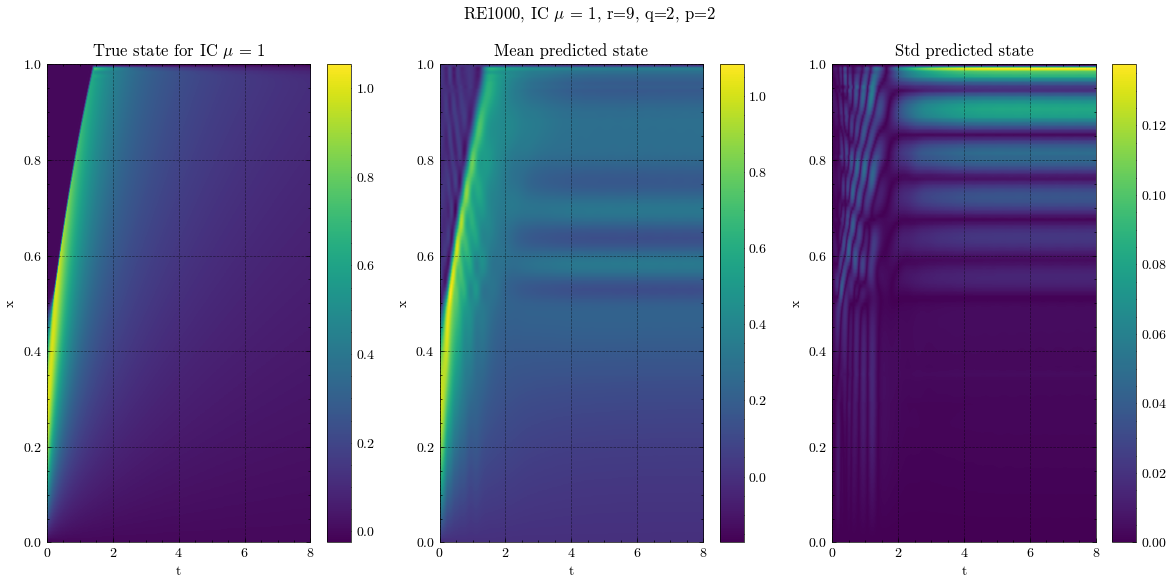

In [36]:
# plot the results side by side
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming s_ref_all is a list of 2D numpy arrays
for i in range(1):
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    XX, YY = np.meshgrid(np.linspace(0.0, T_end_full, int(mean_s_rec_full.shape[0])), np.linspace(0.0, 1.0, mean_s_rec_full.shape[1]))
    print("X = ", XX.shape)
    print("Y = ", YY.shape)
    print("s_ref_all[i] = ", mean_s_rec_full_testing.shape)
    # s = ax.plot_surface(X, Y, s_ref_all[i].reshape(N, int(K+1)), cmap='viridis')
    
    c0 = axs[0].imshow(X_all_nominal_full[2].T, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
    fig.colorbar(c0, ax=axs[0], orientation='vertical')
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('x')
    axs[0].set_title(f'True state for IC $\mu$ = {mus[2]}')
    
    c1 = axs[1].imshow(mean_s_rec_full, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
    fig.colorbar(c1, ax=axs[1], orientation='vertical')
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('x')
    axs[1].set_title(f'Mean predicted state')
    
    c2 = axs[2].imshow(std_s_rec_full, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
    # c2 = axs[1].imshow(s_rec_all[i].reshape(N, int(K+1)), extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', aspect='auto')
    fig.colorbar(c2, ax=axs[2], orientation='vertical')
    axs[2].set_xlabel('t')
    axs[2].set_ylabel('x')
    axs[2].set_title(f'Std predicted state')
    
    
    # fig.colorbar(c1, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05)
    # fig.colorbar(c2, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05)
    plt.suptitle(f"RE1000, IC $\mu$ = {mus[2]}, r={r}, q={q_trunc}, p={p}")
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'RE1000, nominal model solution for IC $\\mu$ = 1, r=9, q=2, p=2')

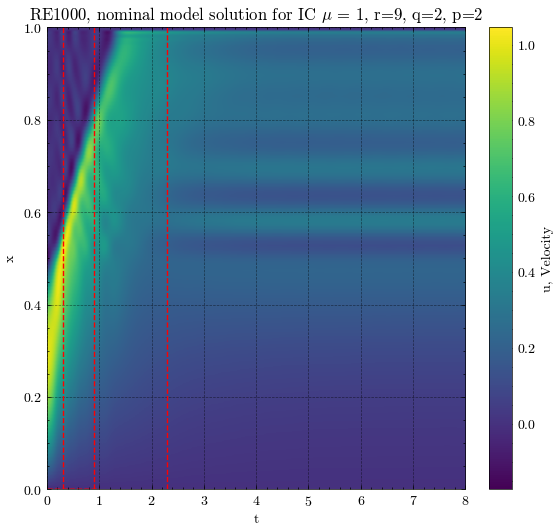

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


# plot 95% confidence interval of the solution
fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)
upper_bound = mean_s_rec_full + confidence_interval
lower_bound = mean_s_rec_full - confidence_interval

XX, YY = np.meshgrid(np.linspace(0.0, T_end_full, int(s_rec_full_nominal.T.shape[0])), np.linspace(0.0, 1.0, s_rec_full_nominal.T.shape[1]))

# surf = ax.plot_surface(XX, YY, s_rec_full_nominal, cmap='viridis', alpha=0.7)

contour = ax.imshow(s_rec_full_nominal, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
cbar = fig.colorbar(ScalarMappable(norm=Normalize(vmin=np.min(s_rec_full_nominal.T), vmax=np.max(s_rec_full_nominal.T)), cmap='viridis'), ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
cbar.set_label('u, Velocity')


# draw vertical plane at t=0.125, 0.375, 1,75
times = [0.3, 0.9, 2.3]
for t in times:
    ax.plot([t, t], [0, 1], [0, 0], color='red', linestyle='--')


ax.set_xlabel('t')
ax.set_ylabel('x')
# ax.set_zlabel('u')
ax.set_title(f'RE1000, nominal model solution for IC $\mu$ = {mus[2]}, r={r}, q={q_trunc}, p={p}')


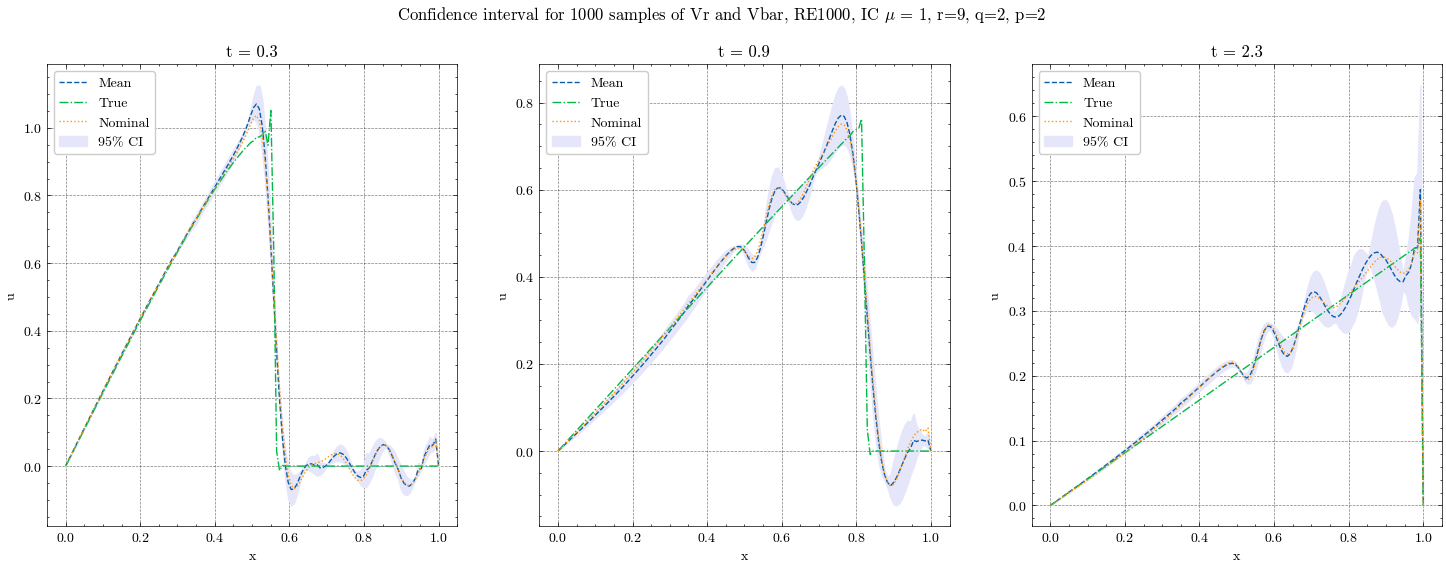

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Example setup (you'll need to define mean_s_rec_full, lower_bound, and upper_bound appropriately)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, t in enumerate(times):
    ax = axs[i]
    t_index = int(t / dt)  # Ensure dt is defined and properly calculated

    # Main plot
    x_values = np.linspace(0, 1, mean_s_rec_full.shape[0])
    mean_line = mean_s_rec_full[:, t_index]
    nominal_line = s_rec_full_nominal[:, t_index]
    true_line = X_all_nominal_full[2].T[:, t_index]
    lower_line = lower_bound[:, t_index]
    upper_line = upper_bound[:, t_index]
    
    ax.plot(x_values, mean_line, label='Mean', linestyle="--")
    ax.plot(x_values, true_line, label='True', linestyle="-.")
    ax.plot(x_values, nominal_line, label='Nominal', linestyle=":")
    ax.fill_between(x_values, lower_line, upper_line, alpha=1, label='95% CI', color='lavender')
    ax.set_title(f"t = {t}")
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.legend(loc="upper left")

    # # Create an inset axis
    # axins = inset_axes(ax, width="25%", height="25%", loc='center right')

    # # Plot the same data on the inset
    # axins.plot(x_values, mean_line, linestyle="--")
    # axins.plot(x_values, true_line, linestyle="-.")
    # axins.plot(x_values, nominal_line, linestyle=":")
    
    # if np.allclose(lower_line, upper_line):
    #     print("Lower and upper bounds are the same")
    #     axins.plot(x_values, lower_line, color='lavender')
    # else:
    #     print("Lower and upper bounds are different")
    #     axins.fill_between(x_values, lower_line, upper_line, color='lavender', alpha=1)

    # # Zoom-in range for the x-axis
    # focus_x_min, focus_x_max = 0.8, 0.81
    # axins.set_xlim(focus_x_min, focus_x_max)
    # axins.set_ylim(np.min(lower_line), np.max(upper_line))

    # # Dynamically determine the y-range based on the focus area
    # mask = (x_values >= focus_x_min) & (x_values <= focus_x_max)
    # focus_y_min = min(np.min(lower_line[mask]), np.min(mean_line[mask]))
    # focus_y_max = max(np.max(upper_line[mask]), np.max(mean_line[mask]))
    # y_margin = (focus_y_max - focus_y_min) * 0.1  # Adjust margin
    # axins.set_ylim(focus_y_min - y_margin, focus_y_max + y_margin)

    # # Optionally remove tick labels to declutter
    # axins.xaxis.set_tick_params(labelbottom=True)
    # axins.yaxis.set_tick_params(labelleft=True)

# plt.tight_layout()
plt.suptitle(f"Confidence interval for 1000 samples of Vr and Vbar, RE1000, IC $\mu$ = {mus[2]}, r={r}, q={q_trunc}, p={p}")
plt.show()
